The wine data set is a multi-class and multi-feature classification data set containing three classes of wine with 59 + 71 + 48 = 178 samples total. 

In this python script I employ k-nearest neighbours analysis to invesitgate the contribution that two features of the wine samples (hue and proline) make towards predicting the class of the wine. 

I also use principal components analysis (PCA) to reduce the dimensionality of the data set and investigate how the variance of every feature collectively predicts the class of wine, visualised as a class-dependent clustering of the data. 

The modules relevant for the subsequent k-nearest neighbours analysis are imported below. 

In [99]:
from pandas import DataFrame
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from plotknn import plot_knn

The complete data set is imported and visualised using a dataframe below. 

In [100]:
X_complete = DataFrame(load_wine().data, columns=load_wine().feature_names)
X_complete

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Next, we establish the target response variable that we will attempt to predict.

Note that **0**, **1**, and **2** refer to the three classes of wine, visualised as an array below.

In [101]:
y = load_wine().target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Scatter plot to show the relationship between all possible feature pair combinations.

Note that when a feature is mapped onto itself a distribution plot is produced instead (i.e. the histograms visible on the diagonal from the top left to bottom right corners). 

Here, we are looking for feature combinations that visualise as distinct 2D shapes, rather than as a single line or as overlapping points. 

This suggests that each feature in the pair will contribute to identifying the class of wine that a sample belongs to, and provides good candidates for further analysis.

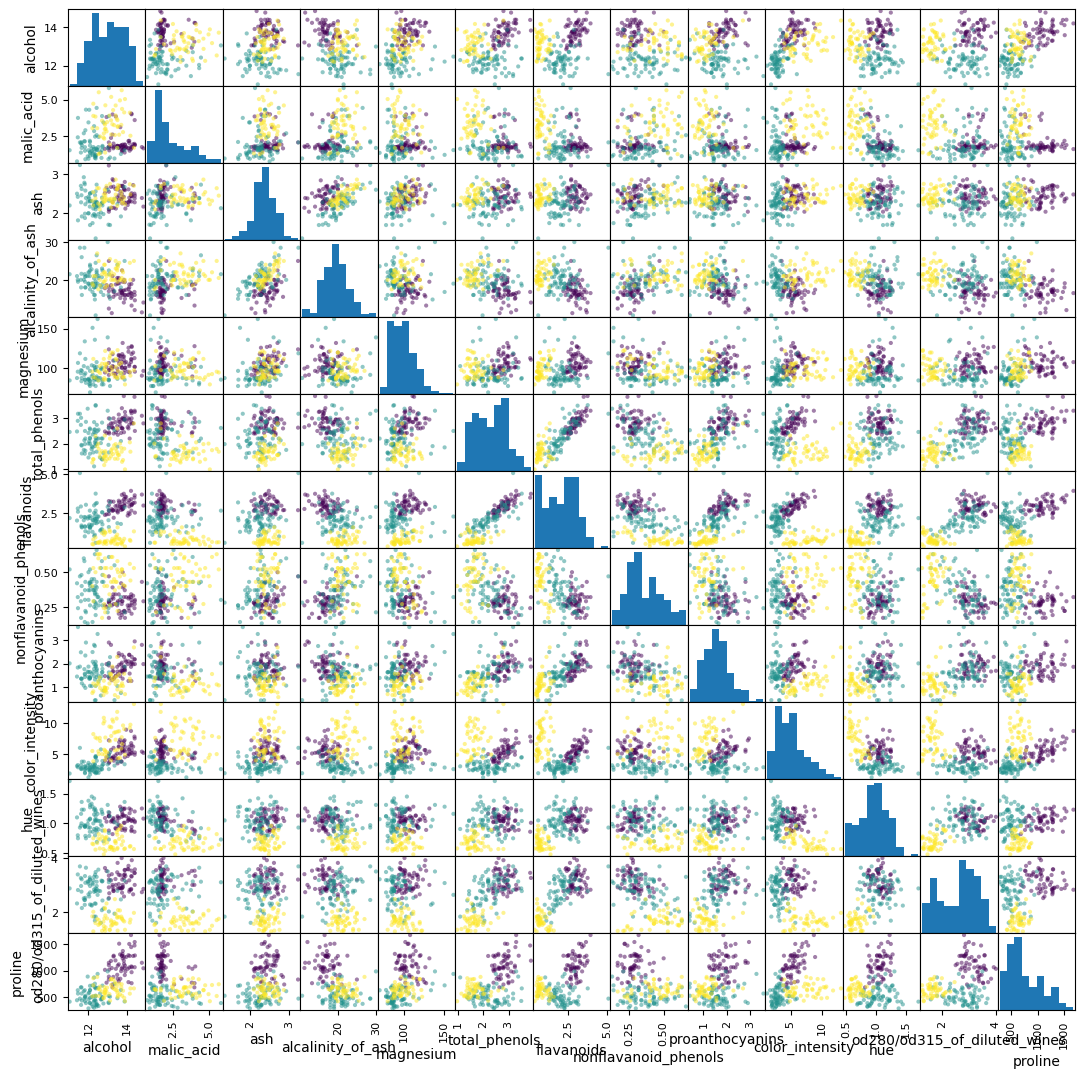

In [102]:
a = scatter_matrix(X_complete, figsize=(13, 13), c=y)

Once two candidate features have been chosen from the scatter plot above (hue and proline), we then plot them seperately to view the relationship in better detail.

<AxesSubplot:xlabel='hue', ylabel='proline'>

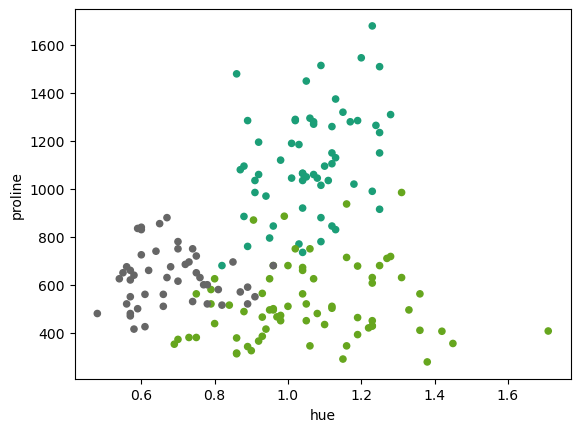

In [103]:
X_complete.plot.scatter("hue", "proline", c=y, colormap="Dark2", colorbar=False)

If the data in the above plot fills 2D space with minimal overlapping points, we then take these two features from our complete data set (i.e., hue and proline) and use them for further analysis.

In [104]:
X = X_complete[["proline","hue"]]
X

,proline,hue
0,1065.0,1.04
1,1050.0,1.05
2,1185.0,1.03
3,1480.0,0.86
4,735.0,1.04
...,...,...
173,740.0,0.64
174,750.0,0.70
175,835.0,0.59
176,840.0,0.60


Split X, the data set with the two features of interest (hue and proline), into a training and test data set.

Parameters sets the range of neighbours to consider for our k-nearest neighbour analysis. 

Considering a range from 1 - 50 neighbours is an example of hyperparameterisation, as we don't know which will yield the best accuracy for classification and so let python run them all and compare.

In [106]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
model = KNeighborsClassifier()
parameters = {
    "n_neighbors" : range(1, 51),
}
clf = GridSearchCV(model, parameters).fit(train_X, train_y)


C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Next, we create a dataframe of the results from our k-nearest neighbour analyses and rank the number of nearest neighbours by their mean test score.

This tells us how accurately the number of nearest neighbours predicts the class of wine from our test data set and allows us to see which number of nearest neighbours is best for further analysis.

In [107]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]


,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.714815,0.062447,1
2,3,0.714245,0.018322,2
3,4,0.714245,0.029739,2
19,20,0.707407,0.039246,4
11,12,0.707407,0.039246,5


Visualise the table above, showing the mean test score and standard deviation for each value of K (i.e., the number of nearest neighbours). 

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

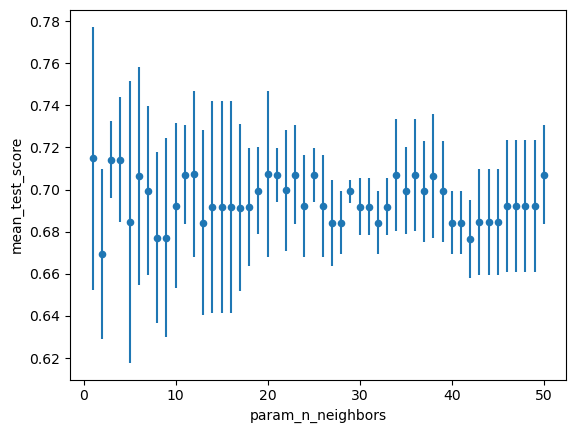

In [108]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

We can see that this matches the same results from the table above.

Next we use the plot_knn function from the plotknn module to plot the results of the k-nearest neighbour analysis with the optimised K value. 

This plot shows our collected data in circles and the background colour shows the classification that would be assigned to any hypothetical new data that was collected at those values.

C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


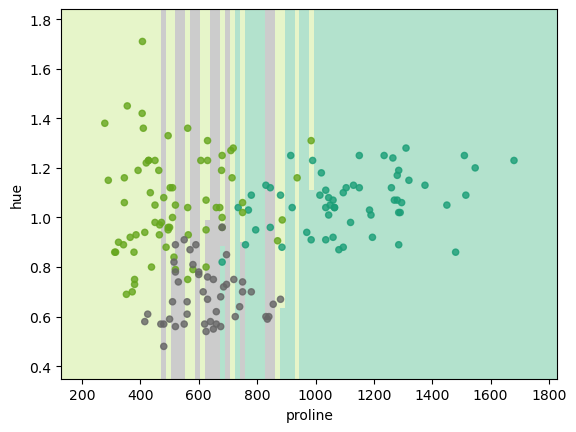

In [109]:
plot_knn(clf, X, y)

The clf.score is a measure of how effective the k-nearest neighbour analysis based on these two features (i.e., hue and proline) is at predicting the class of wine, with a score closest to 1 being the most effective two features. 

In [29]:
clf.score(test_X, test_y)

C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7555555555555555

There is an option to use a scaling function to allow for better seperation between the two variables, even if they are on different scales to one another.

In [110]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Rescale the data in a new data frame using a standardised scale.

In [111]:
X_scaled_raw = scaler.transform(X)

In [112]:
X_scaled = pd.DataFrame(X_scaled_raw, columns=X.columns)

Plot the newly rescaled data.

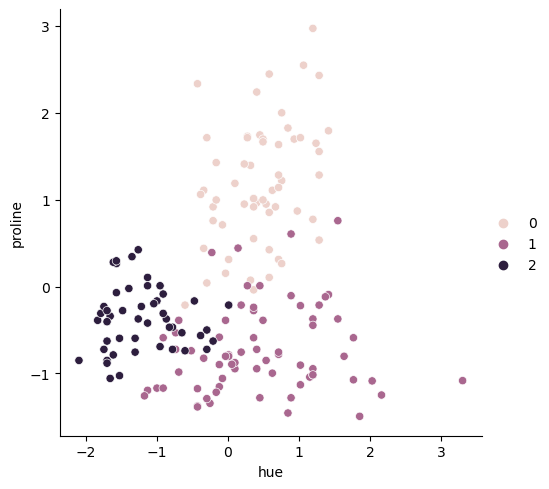

In [113]:
sns.relplot(data=X_scaled, x="hue", y="proline", hue=y)

Perform the same k-nearest neighbour analysis using the rescaled data frame with the same two features as above (hue and proline).

In [114]:
scaled_knn = make_pipeline( StandardScaler(), KNeighborsClassifier())
scaled_knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Compute a new model score using the scaled data frame. 

In [115]:
scaled_knn.fit(train_X, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [116]:
scaled_knn.score(test_X, test_y)

C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9555555555555556

The new scaled model score is closer to 1 than the previous unscaled model score and, therefore, predicts the class of wine with greater accuracy than the unscaled model. 

Complete by plotting the k-nearest neighbours graph.

C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


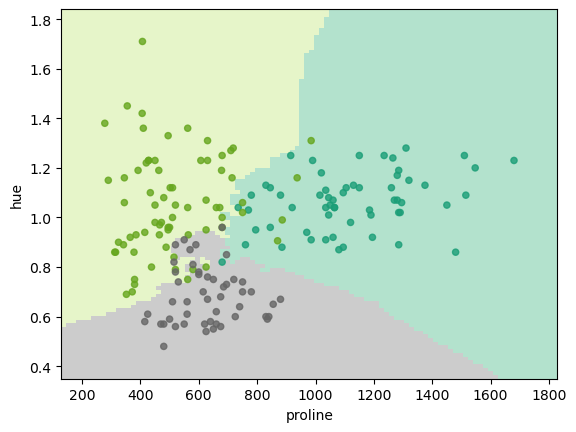

In [117]:
plot_knn(scaled_knn, X, y)

# Principal Components Analysis (PCA)

### To reduce the dimensionality of the data set and investigate how the variance of every feature collectively predicts the class of wine, visualised as a class-dependent clustering of the data below. 

First, we import the wine data set as a data frame.

In [118]:
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_wine
X = DataFrame(load_wine().data, columns=load_wine().feature_names)
X
y = load_wine().target

PCA is sensitive to the scale of the features.

Given that the wine data set has features of different scales, we need to standardise the features onto a unit scale.

In [119]:
from sklearn.preprocessing import StandardScaler
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
# Separating out the features
x = X.loc[:, features].values
# Separating out the target
y = load_wine().target
y
# Standardizing the features to a unified scale
x = StandardScaler().fit_transform(x)

The following code calculates three principal components that project the variation in the data into three dimensions, principal component 1 (PC1), PC2, and PC3.

In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
X["target"] = y
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


We create a new data frame by concatenating the data into a new data frame that contains a column for each principal component that has been assigned to each observation, as well as a data frame that includes our target, i.e. the class of wine.

In [121]:
finalDf = pd.concat([principalDf, X['target']] , axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,target
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


Next, we calculate how much variation in the data is explained by the three principal components.

In [122]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

PC1 explains 36.20%, PC2 explains 19.20%, and PC3 explains 11.12% of the variation in our data set. 

Cumulatively, PC1, PC2, and PC3 account for 66.52%; i.e., a considerable proportion of the variation in our wine data set.

Finally, we plot the first two principal components accounting for the majority of the variaiton in our data set (i.e., PC1 and PC2) against each other to visualise the variation in the wine data set for every pairing of wine class.

The different colours reflect the class of wine.

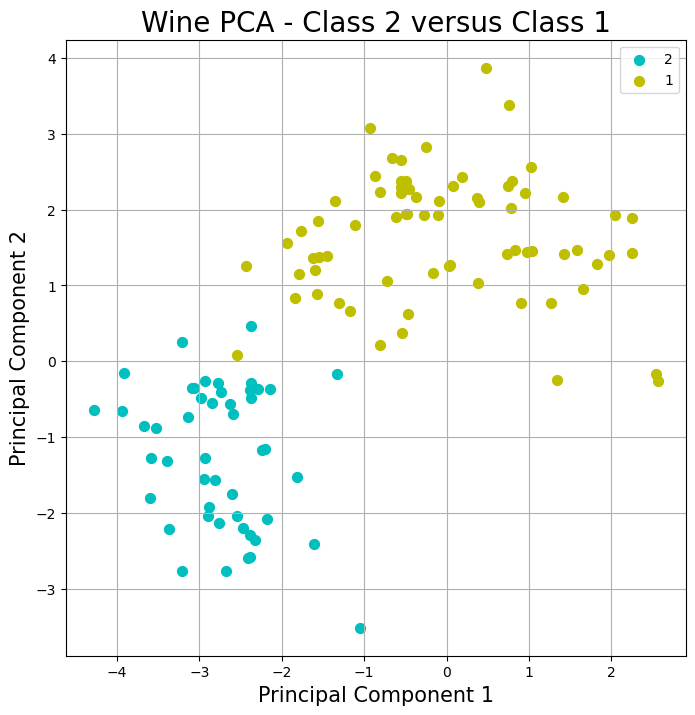

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Wine PCA - Class 2 versus Class 1', fontsize = 20)
targets = [2, 1]
colors = ['c', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

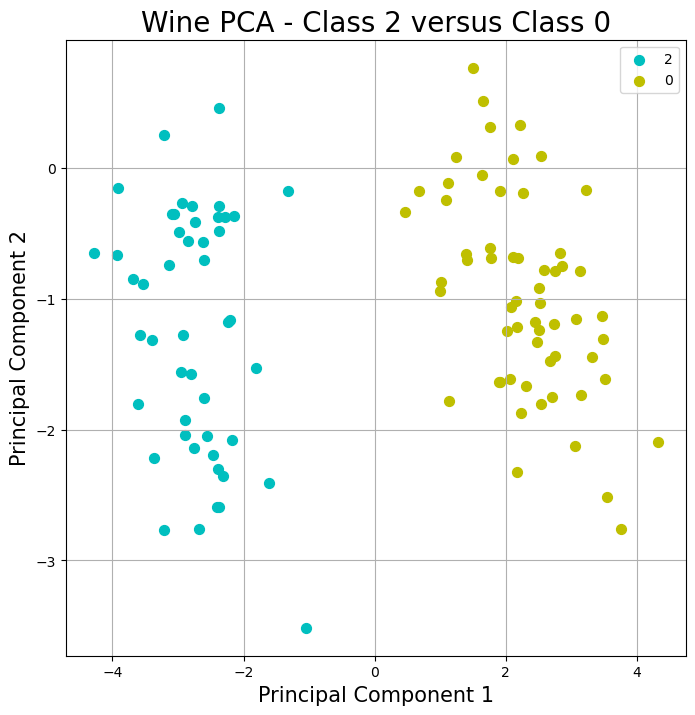

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Wine PCA - Class 2 versus Class 0', fontsize = 20)
targets = [2, 0]
colors = ['c', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

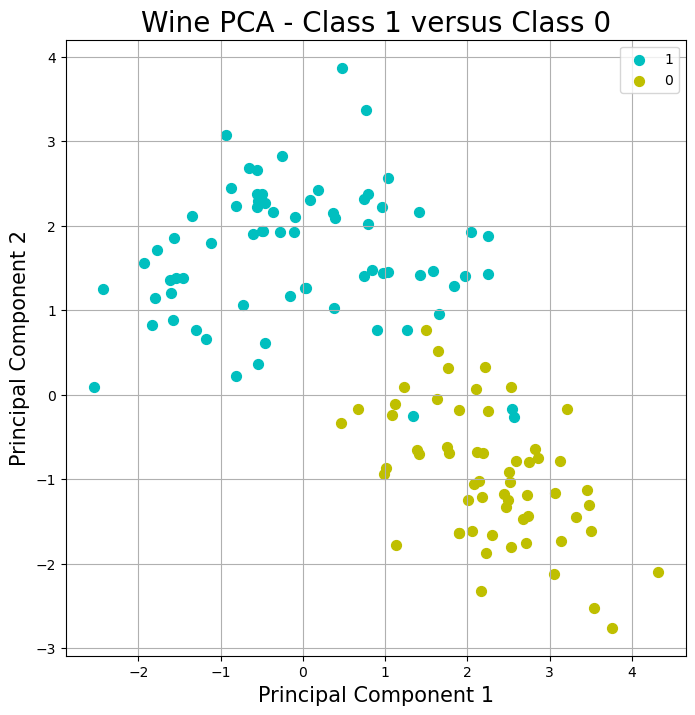

In [125]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Wine PCA - Class 1 versus Class 0', fontsize = 20)
targets = [1, 0]
colors = ['c', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

While the data points cluster separately in our PCA in correspondence to the class, there is also some overlap between them.

In [126]:
X = finalDf[["principal component 1", "principal component 2"]]
X

,principal component 1,principal component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


Now we will conduct a k-nearest neighbours analysis of PC1 and PC2 to visualise the spread of the data and predict the clustering and classifcation of new hypothetical data added into the data set.

Parameters sets the range of neighbours that we want to consider for our k-nearest neighbour analysis. 

We considered the range from 1 - 51 neighbours. 

This is an example of hyperparameterisation, as we don't know which will yield the best accuracy for classification and so let python run them all and compare.

In [129]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
model = KNeighborsClassifier()
parameters = {
    "n_neighbors" : range(1, 51),
}
clf = GridSearchCV(model, parameters).fit(train_X, train_y)

C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Next, we create a dataframe of the results from our k-nearest neighbour analyses and rank the number of nearest neighbours by their mean test score.

This tells us how accurately the number of nearest neighbours predicts the class of wine from our test data set and allows us to see which number of nearest neighbours is best for further analysis.

In [130]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
22,23,0.969801,0.015113,1
23,24,0.969801,0.015113,1
24,25,0.969801,0.015113,1
25,26,0.969801,0.015113,1
26,27,0.969801,0.015113,1


Visualise the table above, showing the mean test score and standard deviation for each value of K (i.e., the number of nearest neighbours). 

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

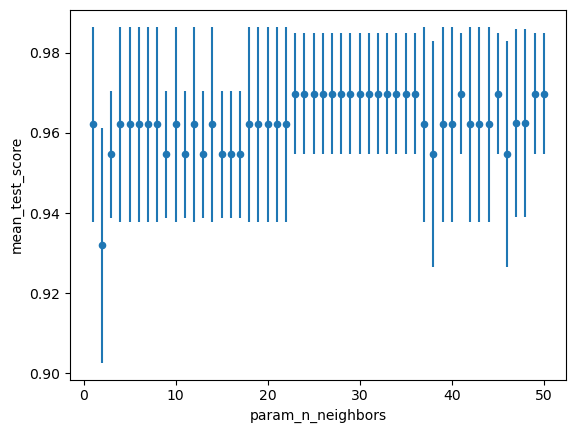

In [131]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

We can see that this matches the same results from the table above.

Next we use the plot_knn function from the plotknn module to plot the results of the k-nearest neighbour analysis with the optimised K value. 

This plot shows our collected data in circles and the background colour shows the classification that would be assigned to any hypothetical new data that was collected at those values.

C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Joe\anaconda1\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

0.9777777777777777

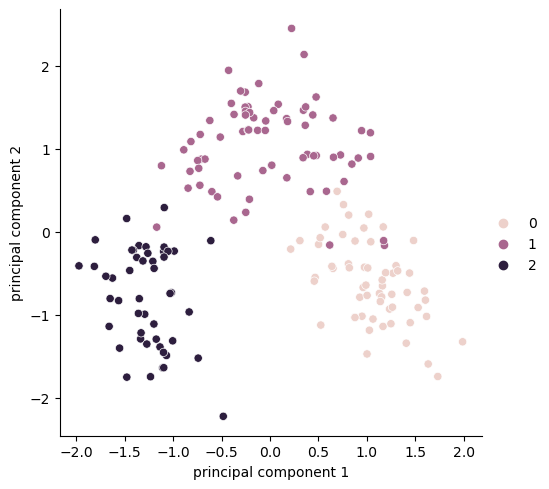

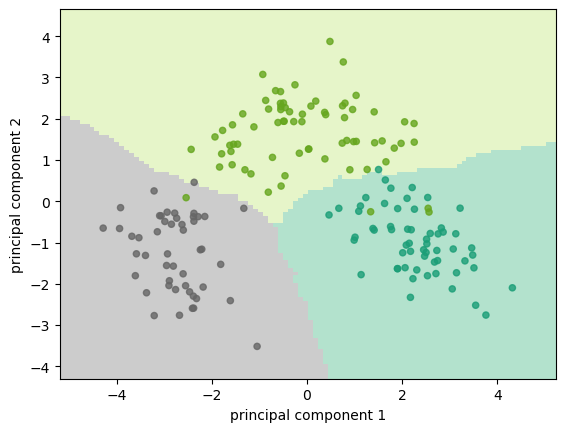

In [132]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled_raw = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_raw, columns=X.columns)
sns.relplot(data=X_scaled, x="principal component 1", y="principal component 2", hue=y)

scaled_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
scaled_knn
scaled_knn.fit(train_X, train_y)
plot_knn(scaled_knn, X, y)
scaled_knn.score(test_X, test_y)

Comparing the scaled model score for hue versus proline (0.955...) with the scaled score for our PCA (0.977...), we see that the PCA predicts the class of wine with a greater degree of accuracy than when comparing the hue versus the proline content of a wine. 

This is visualised as a more distinct clustering of the data from each class of wine in our PCA in comparison with the hue versus proline k-nearest neighbours analysis. 

In [133]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

wine = datasets.load_wine()

X = scale(load_wine().data)
y = load_wine().target

pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X)

In [134]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=load_wine().feature_names)
loadings

,PC1,PC2
alcohol,0.144329,-0.483652
malic_acid,-0.245188,-0.224931
ash,-0.002051,-0.316069
alcalinity_of_ash,-0.239320,0.010591
magnesium,0.141992,-0.299634
total_phenols,0.394661,-0.065040
flavanoids,0.422934,0.003360
nonflavanoid_phenols,-0.298533,-0.028779
proanthocyanins,0.313429,-0.039302
color_intensity,-0.088617,-0.529996


The above table breaks down the contribution that each feature makes towards the variation encapsulated within PC1 and PC2 (the ability of PC1 and PC2 to each predict the class of wine). 